<a href="https://colab.research.google.com/github/CCoolbaugh1/SN/blob/main/GPR_on_SN_Tuning_Removed_Data_Points.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [750]:
!apt-get install git
!git clone https://github.com/afyanyan/SN.git
%cd SN/Database/Process_Data
from sklearn import preprocessing
from scipy.signal import find_peaks
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
Cloning into 'SN'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (442/442), done.
remote: Compressing objects: 100% (393/393), done.
remote: Total 442 (delta 112), reused 186 (delta 38), pack-reused 0 (from 0)
Receiving objects: 100% (442/442), 849.49 KiB | 2.57 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/Database/Process_Data/SN/D

In [751]:
SN_name = input("Enter SN name: ")
file = SN_name + "_frg_r.csv"
frg_r_all = pd.read_csv(file)
display(frg_r_all)

Enter SN name: SN2023mpz


,Unnamed: 0,MJD,filter,unforced_mag,unforced_mag_error,unforced_mag_status,forced_ujy,forced_ujy_error
0,0,60285.133507,r,19.721,0.189,positive,NaN,NaN
1,2,60268.133310,r,19.771,0.271,positive,46.1,5.6
2,5,60260.109572,r,19.719,0.184,positive,45.6,5.2
3,8,60255.145833,r,19.723,0.161,positive,46.4,3.5
4,11,60253.144595,r,19.689,0.172,positive,49.1,3.6
5,12,60251.184711,r,19.653,0.151,positive,50.3,4.3
6,19,60245.161840,r,19.681,0.208,positive,46.4,6.2
7,21,60239.222697,r,19.642,0.173,positive,50.5,3.9
8,24,60237.183565,r,19.621,0.129,positive,53.5,3.9
9,26,60235.139028,r,19.504,0.111,positive,57.7,3.0


In [752]:
def plot_fig(X,y,X_test,y_pred,sigma, removed_set):
    plt.close()
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, 'ro', label="Observed Data")  # Original data points
    plt.plot(X_test, y_pred, 'b-', label="GPR Prediction")  # Mean prediction
    plt.fill_between(X_test.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, color='blue', alpha=0.2, label="95% Confidence Interval")
    Xr = removed_set[['MJD']].values
    Yr = removed_set[['unforced_mag']].values
    plt.scatter(Xr, Yr, color='black', label="Removed Points")
    plt.xlabel("MJD")
    plt.ylabel("Unforced Magnitude")
    plt.gca().invert_yaxis()
    plt.title("Gaussian Process Regression for MJD vs Unforced Magnitude")
    plt.legend()
    plt.show()
    return()

In [753]:
from random import randint
def random_point_removal(frg_r, N_remove): #randomly selects points to remove
  reduced_set = frg_r_all.sample(n=len(frg_r_all) - N_remove).sort_values(by='MJD')
  return reduced_set

In [754]:
def GPR(X,y,plot):
    # Define kernel (e.g., Constant Kernel * RBF Kernel
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
    # Initialize Gaussian Process Regressor
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

    reduced_set = random_point_removal(frg_r.copy, N_remove) #find set with removed points
    removed_set = frg_r.copy()
    removed_set = removed_set.drop(reduced_set.index)

    X = reduced_set[['MJD']].values
    y = reduced_set[['unforced_mag']].values
    # Fit to the data
    gpr.fit(X, y)

    # Predict with uncertainty
    X_test = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_test, return_std=True)

    idx = np.argmax(y_pred)
    t_sbo = X_test[idx].item()
    print ("Shock break out time = ", t_sbo)

    if plot:
        plot_fig(X,y,X_test,y_pred,sigma, removed_set)
    return (t_sbo)

Enter number of iterations: 10
Enter number of points to remove per iteration: 10
Print Graphs? (Yes or No): Yes
1
Shock break out time =  60259.939495494495


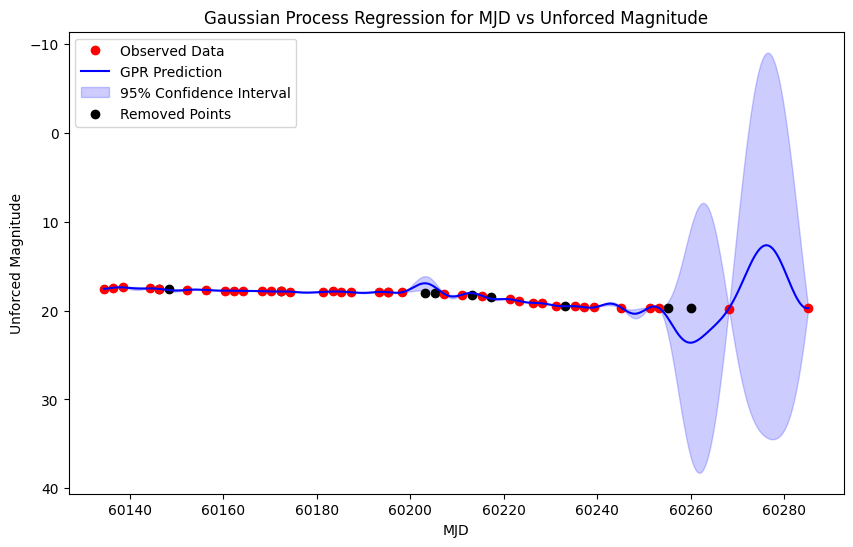

2
Shock break out time =  60265.0688152022


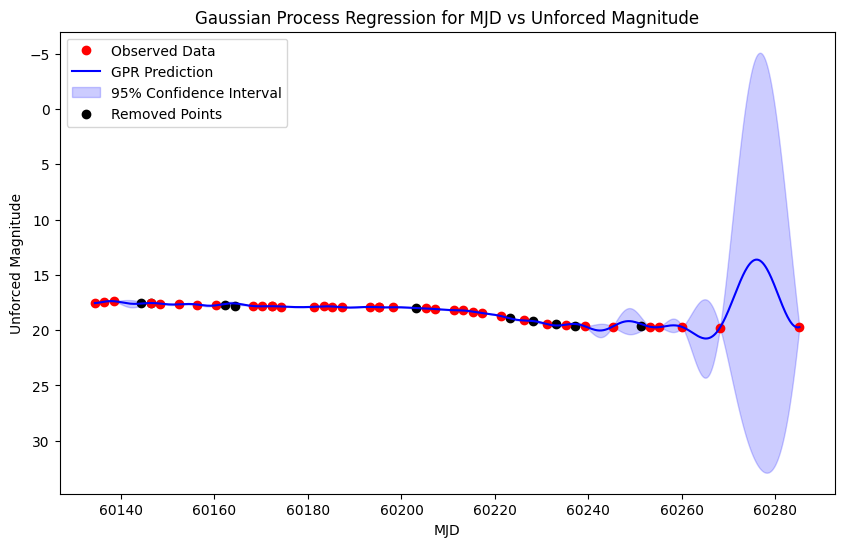

3
Shock break out time =  60249.68085607908


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


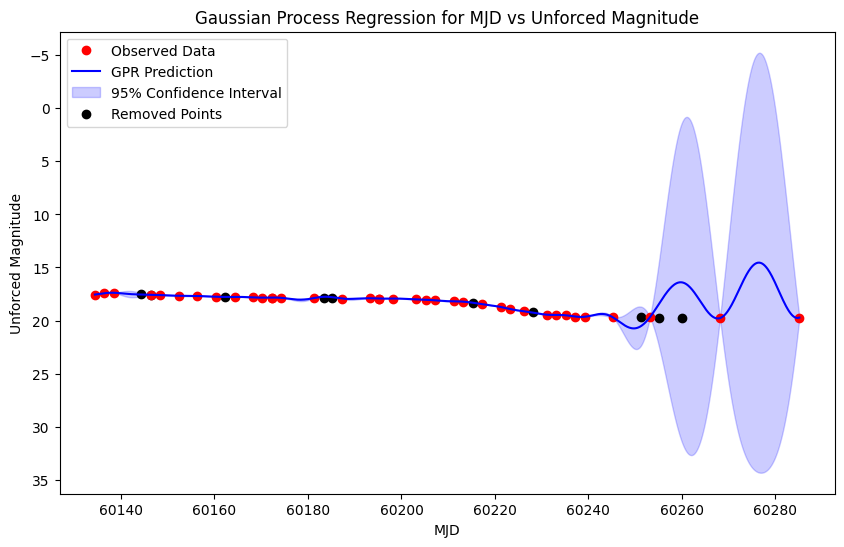

4
Shock break out time =  60257.07311095195


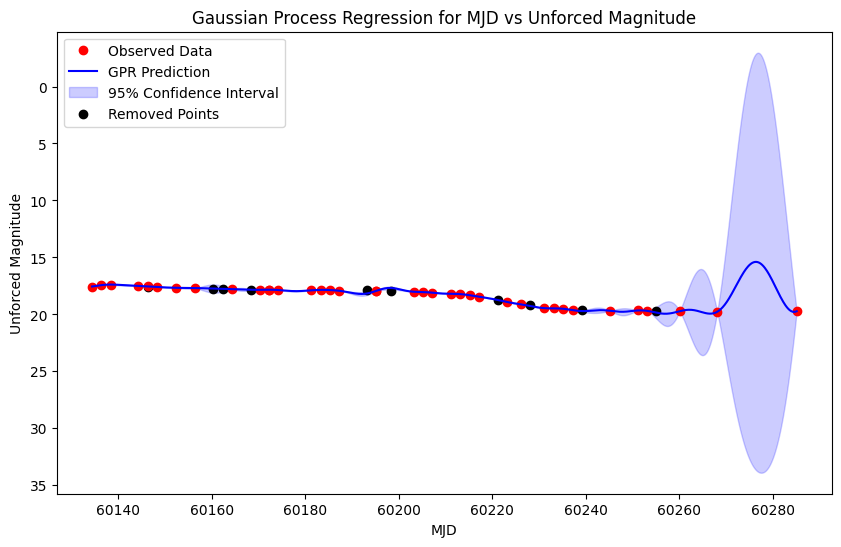

5
Shock break out time =  60141.381971766765


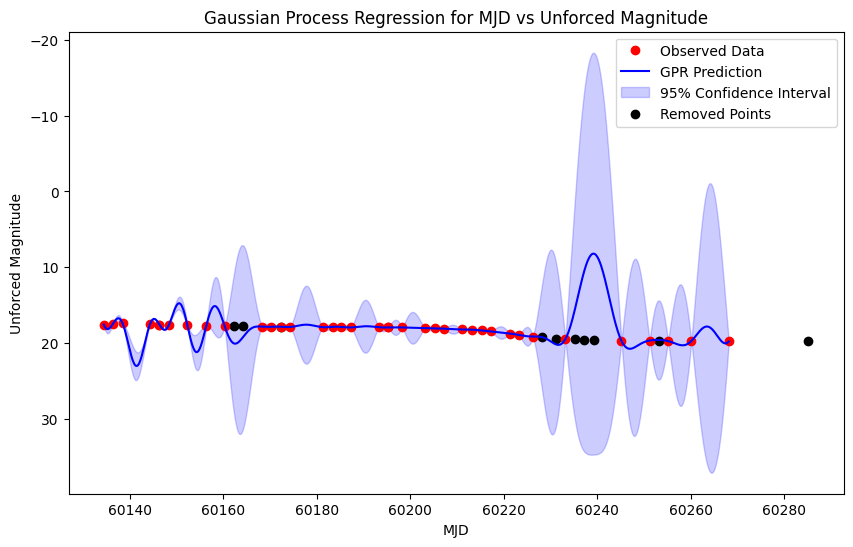

6
Shock break out time =  60140.456518773775


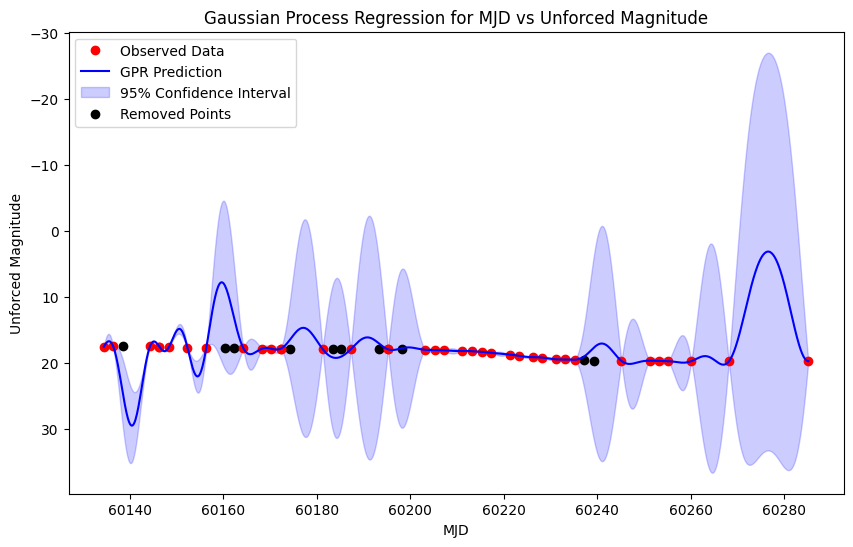

7


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Shock break out time =  60266.12563304805


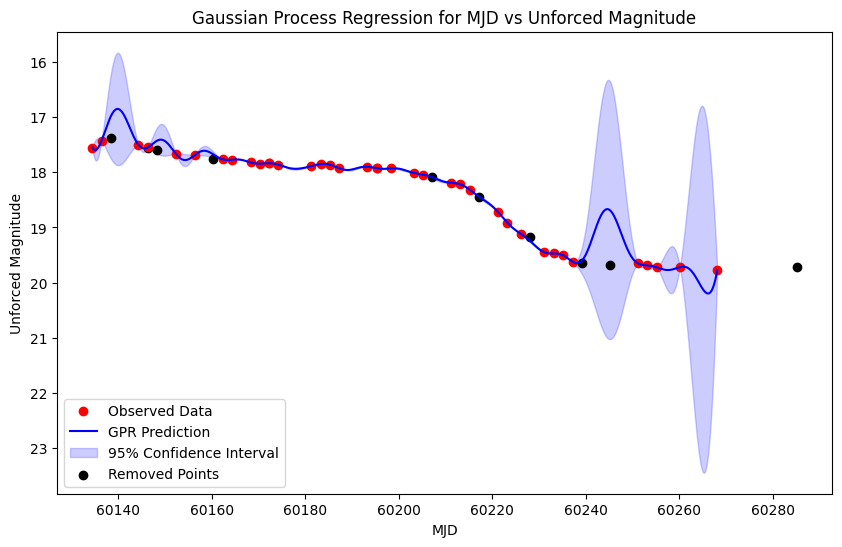

8
Shock break out time =  60155.43571043043


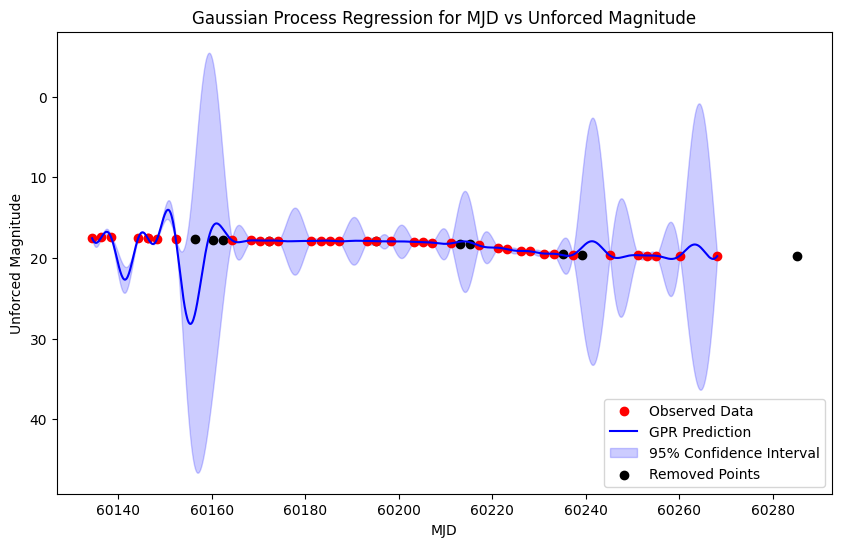

9
Shock break out time =  60139.09875767468


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


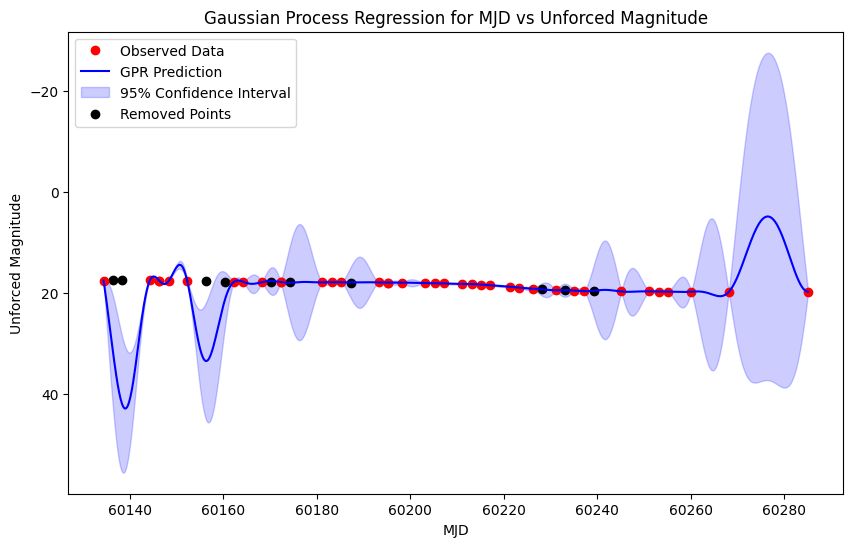

10
Shock break out time =  60264.46536582482


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


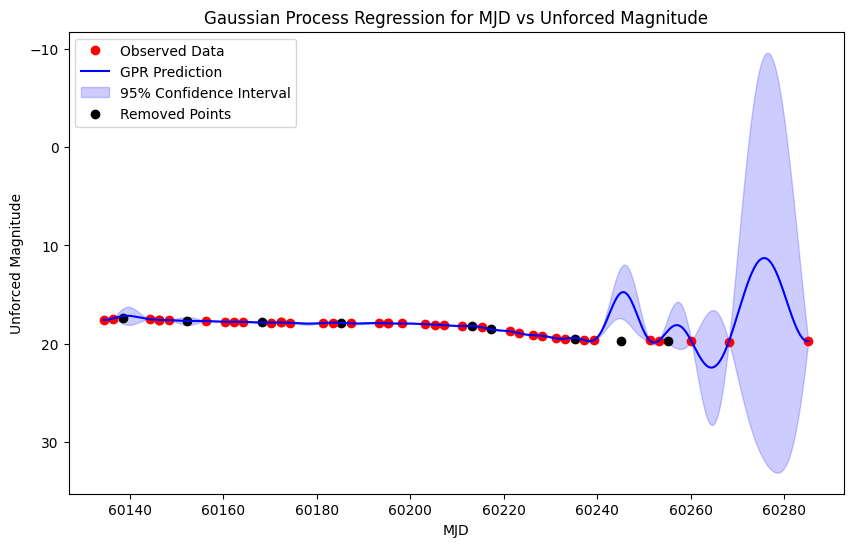

In [755]:
N_loop = int(input("Enter number of iterations: "))
N_remove = int(input("Enter number of points to remove per iteration: "))
graphs = input("Print Graphs? (Yes or No): ")

t_sbo = []
t=0
i = 1
if graphs == 'Yes':
  while i <= N_loop:
      print(i)
      X = frg_r_all[['MJD']].values
      y = frg_r_all[['unforced_mag']].values
      t = GPR(X,y,True)
      t_sbo.append(t)
      i+=1

if graphs == 'No':
  while i <= N_loop:
      print(i)
      frg_r = frg_r_all.copy()
      X = frg_r[['MJD']].values
      y = frg_r[['unforced_mag']].values
      t = GPR(X,y,False)
      t_sbo.append(t)
      i += 1

In [756]:
mean_t = np.mean(t_sbo)
print (mean_t)

# Calculate relative errors: (value - mean) / mean
relative_errors = (t_sbo - mean_t) / mean_t
print (relative_errors)

60213.87262352463
[ 0.00076505  0.00085024  0.00059468  0.00071745 -0.00120389 -0.00121926
  0.00086779 -0.00097049 -0.0012418   0.00084022]


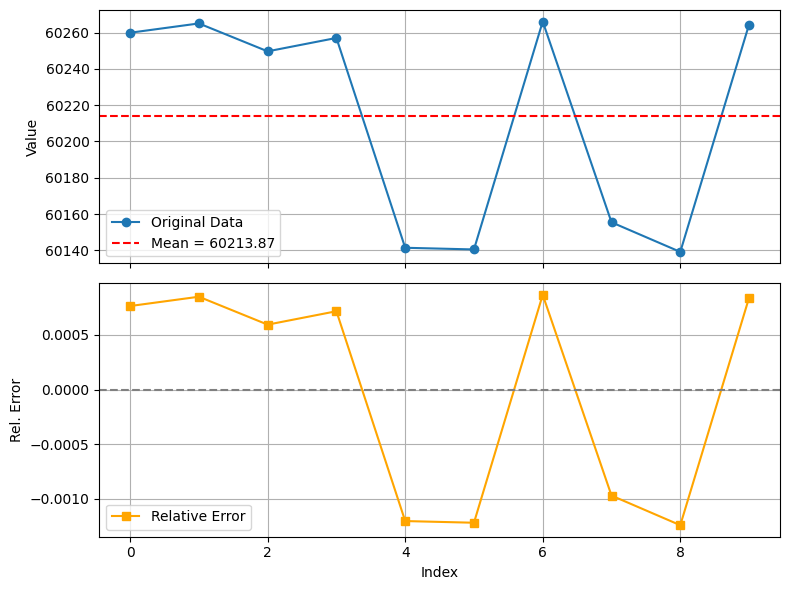

In [757]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plot original data with mean
axs[0].plot(t_sbo, marker='o', label='Original Data')
axs[0].axhline(mean_t, color='red', linestyle='--', label=f'Mean = {mean_t:.2f}')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].grid(True)

# Plot relative error
axs[1].plot(relative_errors, marker='s', color='orange', label='Relative Error')
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Rel. Error')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()